# Project in Applied Statistics Module

### Edward Cronin ATU Student G00425645

# PlantGrowth Analysis

## Overview

This project analyzes the PlantGrowth dataset from Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables: a treatment group and the weight of plants within those groups. The project objective is to perform t-tests and ANOVA on this dataset while describing and explaining the work.

## Objectives

1. Download and Save the Dataset: Download the dataset from Vicent Arel-Bundock's Rdatasets page and save it to your repository.

2. Describe the Dataset: Load the dataset into a pandas DataFrame and provide a detailed description in your notebook. This includes summarizing the dataset, displaying the first few rows, and providing statistical information about the variables.

3. Describe the t-test: Explain what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test: Conduct a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

5. Perform ANOVA: Conduct an ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

6. Explain the Use of ANOVA: Discuss why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups

### Steps to complete this project

Step 1: Download and Save the Dataset:
- The dataset is downloaded from [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/datasets.html).
- The dataset is saved to Applied_Statistics_MyWork repository.

Step 2: Describe the Dataset:
- Load the dataset into a pandas DataFrame.
- Provide a summary of the dataset, including the number of observations, the variables, and their types.

Step 3: Perform t-tests and ANOVA:
- Describe what a t-test is, how it works, and its assumptions.
- Perform a t-test to determine if there is a significant difference between the two treatment groups (trt1 and trt2).
- Perform ANOVA to determine if there is a significant difference between the three treatment groups (ctrl, trt1, and trt2).

Step 4: Explain my Work:
- Explain why ANOVA is more appropriate than multiple t-tests when analyzing more than two groups.

## Download and Save the Dataset

The dataset was downloaded from the Vicent Arel-Bundock's Rdatasets page and saved to the repository. The following code was used to complete this task:

In [1]:
# Import libraries to complete this project
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Download the dataset
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv(url)

# Save the dataset to the repository 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
df.to_csv('data/plantgrowth.csv', index=False)

# Step 2: Describe the Dataset

The dataset was loaded into a pandas DataFrame as it is a common practice in data analysis for several reasons:

__Ease of Data Manipulation__

DataFrames provide a powerful and flexible way to manipulate and analyze data. They allow you to quickly filter, sort, and transform data using intuitive syntax. For example, you can quickly select specific rows or columns, apply functions to the data, and perform aggregations.

__Integration with Other Libraries__

pandas integrates seamlessly with other Python libraries commonly used in data analysis, such as NumPy, SciPy, Matplotlib, and Seaborn. This integration makes it easy to perform complex statistical analyses, create visualizations, and conduct machine learning tasks.

__Handling Missing Data__
DataFrames provide robust methods for handling missing data. You can quickly identify, fill, or drop missing values, ensuring your analysis is accurate and reliable.

__Data Cleaning and Preparation__
Pandas offer a wide range of functions for cleaning and preparing data. You can easily remove duplicates, convert data types, and handle categorical data which is crucial for ensuring that your data is in the correct format for analysis.

__Descriptive Statistics and Summarization__
DataFrames make it easy to generate descriptive statistics and summaries of your data. You can quickly calculate measures such as mean, median, standard deviation, and more.

__Data Visualization__
Pandas work well with visualization libraries like Matplotlib and Seaborn. You can create various plots and charts to visualize your data and gain insights. Visualizations are essential for communicating your findings and making data-driven decisions.

__Exploration of Dataset__
The first few rows of the dataset were displayed using the head() method, which gives a quick overview of the data. Next, we summarize the dataset using the describe() method. This method gives us crucial statistical information about the numerical columns in the dataset, such as the count, mean, standard deviation, minimum, and maximum values. To get information on the dataset, such as the number of observations, the info() method is used. The following code was used to complete this task:

## Describe the Dataset

In [2]:
# # To get an initial look at the dataset, we can display the first few rows using the head() method. This gives us a quick overview of the data.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

# Extract the treatment groups
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

df = pd.DataFrame({'ctrl': ctrl, 'trt1': trt1, 'trt2': trt2})
print(df.head())

   ctrl  trt1  trt2
0  4.17   NaN   NaN
1  5.58   NaN   NaN
2  5.18   NaN   NaN
3  6.11   NaN   NaN
4  4.50   NaN   NaN


In [3]:
# Show full dataframe output.
df

,ctrl,trt1,trt2
0,4.17,NaN,NaN
1,5.58,NaN,NaN
2,5.18,NaN,NaN
3,6.11,NaN,NaN
4,4.50,NaN,NaN
5,4.61,NaN,NaN
6,5.17,NaN,NaN
7,4.53,NaN,NaN
8,5.33,NaN,NaN
9,5.14,NaN,NaN


### Data Frame Output Explained

The values in each row represent the weight of the plants in each group. In row 1:

The weight of the plant in the control group (ctrl) is 4.17.

The weight of the plant in the first treatment group (trt1) is not available (represented by NaN, which stands for "Not a Number").

The weight of the plant in the second treatment group (trt2) is also not available (NaN).

This indicates that for this particular observation, only the weight of the plant in the control group was recorded, while the weights for the treatment groups were not recorded or are missing.

In [4]:
# Describe the dataset
# We provide a summary of the dataset using the describe() method. 
# This method gives us important statistical information about the numerical columns 
# in the dataset, such as the count, mean, standard deviation, minimum, and maximum values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df.describe()

,ctrl,trt1,trt2
count,10.000000,10.000000,10.000000
mean,5.032000,4.661000,5.526000
std,0.583091,0.793676,0.442573
min,4.170000,3.590000,4.920000
25%,4.550000,4.207500,5.267500
50%,5.155000,4.550000,5.435000
75%,5.292500,4.870000,5.735000
max,6.110000,6.030000,6.310000


## Information about the dataset 

In [5]:
# The info() method provides a concise summary of the dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ctrl    10 non-null     float64
 1   trt1    10 non-null     float64
 2   trt2    10 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes
None


# Step 3: Perform T-Test

https://www.scribbr.com/statistics/t-test/

https://www.statisticshowto.com/probability-and-statistics/t-test/

A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is a fundamental method in hypothesis testing to assess the differences between groups. Here’s a detailed explanation:

### What is a t-test?

A t-test evaluates whether the means of two groups are statistically different from each other. It is based on the t-distribution and is commonly used when the sample sizes are small and the population standard deviations are unknown. There are different types of t-tests, including:

__Independent Samples t-test:__ Compares the means of two independent groups (e.g., treatment vs. control).

__Paired Samples t-test:__ Compares the means of the same group at different times (e.g., before and after treatment).

__One-Sample t-test:__ Compares the mean of a single group to a known value or population mean.

### Why is it important?

The t-test is important for several reasons:

__Hypothesis Testing:__ It helps in testing hypotheses about the population means. For example, it can determine if a new treatment is more effective than an existing one.

__Decision Making:__ It provides a basis for making decisions based on data. For instance, businesses can use t-tests to compare the performance of two products.

__Scientific Research:__ It is widely used in scientific research to validate experimental results and ensure that observed differences are not due to random chance.

__Simplicity and Efficiency:__ The t-test is relatively simple to perform and interpret, making it accessible for researchers and analysts.

### Load the Data and Seperate the Groups

In [6]:
# Data was loaded successully in Step 1

# Filter the dataset to include only trt1 and trt2 groups
df_original = pd.read_csv(url)
df_filtered = df_original[df_original['group'].isin(['trt1', 'trt2'])]

# Extract the treatment groups
trt1 = df_filtered[df_filtered['group'] == 'trt1']['weight']
trt2 = df_filtered[df_filtered['group'] == 'trt2']['weight']



### Calculate the Means and Standard Deviations

In [7]:
# Calculate means and standard deviations
mean_trt1 = trt1.mean()
mean_trt2 = trt2.mean()
std_trt1 = trt1.std()
std_trt2 = trt2.std()

print(f"Mean of trt1: {mean_trt1}, Standard Deviation of trt1: {std_trt1}")
print(f"Mean of trt2: {mean_trt2}, Standard Deviation of trt2: {std_trt2}")

Mean of trt1: 4.661, Standard Deviation of trt1: 0.7936756964347034
Mean of trt2: 5.526, Standard Deviation of trt2: 0.44257328332278606


### Interpretation of Output of Mean and Standard Deviations

__Mean of trt1: 4.661__

Mean: The mean (average) weight of plants in the treatment group trt1 is 4.661. This value represents the central tendency of the plant weights in this group.

__Standard Deviation of trt1: 0.7936756964347034__

Standard Deviation: The standard deviation of 0.7936756964347034 indicates the amount of variation or dispersion of plant weights around the mean in the trt1 group. A lower standard deviation means the weights are closer to the mean, while a higher standard deviation indicates more spread out weights.

__Mean of trt2: 5.526__

Mean: The mean (average) weight of plants in the treatment group trt2 is 5.526. This value represents the central tendency of the plant weights in this group.

__Standard Deviation of trt2: 0.44257328332278606__

Standard Deviation: The standard deviation of 0.44257328332278606 indicates the amount of variation or dispersion of plant weights around the mean in the trt2 group. A lower standard deviation means the weights are closer to the mean, while a higher standard deviation indicates more spread out weights.

__Practical Implications__

Comparison of Means: The mean weight of plants in trt2 (5.526) is higher than in trt1 (4.661), suggesting that the treatment trt2 might be more effective in increasing plant weight.

__Comparison of Standard Deviations:__

The standard deviation in trt2 (0.44257328332278606) is lower than in trt1 (0.7936756964347034), indicating that the weights in trt2 are more consistently close to the mean compared to trt1.

These statistics provide insights into the effectiveness and consistency of the treatments applied to the plants.

## T-Test Assumptions

  ### What are the assumptions of a t-test?
 
 __Normality:__ 

 https://statisticsbyjim.com/hypothesis-testing/t-test/

 - The data should be approximately normally distributed. This is especially important for small sample sizes
 - In the context of the PlantGrowth dataset, we need to check if the weights of the plants within each treatment group (ctrl, trt1, trt2) are normally distributed. This can be done using visual methods like histograms or Q-Q plots, or statistical tests like the Shapiro-Wilk test.
 
 __Homogeneity of Variances:__ 

 https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/homogeneity-tests/

 - The variances of the two groups should be equal. This assumption can be tested using tests such as Levene's test
 - For the PlantGrowth dataset, we need to ensure that the variances of the plant weights across the different treatment groups are equal. If the variances are not equal, the t-test results may not be valid.

 c. __Independence:__ 

 https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/independence-statistics/

 -The observations within each group should be independent of each other. 
 - In the PlantGrowth dataset, one plant's weight should not influence another plant's weight when it is within the same group. This assumption is crucial to ensure that the t-test results are valid.

 d. __Random sampling:__ 

 https://www.statology.org/t-test-assumptions/

 - Both samples should be obtained using a random sampling method.
 - For the PlantGrowth dataset, the plants should have been randomly assigned to the different treatment groups. Random sampling helps ensure that the samples are representative of the population and that the t-test results are generalisable.
 -  By ensuring that these assumptions are met, we can confidently perform t-tests on the PlantGrowth dataset to determine if there are significant differences in plant weights between the treatment groups.  It is important to note however, that if one or more of these assumptions are violated, then the results of the two-sample t-test may be unreliable or even misleading.

## Perform T-Test

In [8]:
# Perform the t-test
t_statistic, p_value = ttest_ind(trt1, trt2)

print(f"t-statistic: {t_statistic}, p-value: {p_value}")


t-statistic: -3.0100985421243616, p-value: 0.0075184261182198574


## Use scipy.stats to verify the t-statistic

In this step, we will use the scipy.stats module to verify the t-statistic. This verification ensures the accuracy of our calculations and provides a reliable method to cross-check our results.

In [9]:
# Use scipy.stats to verify the t-statistic
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
t_statistic_scipy, p_value = ttest_ind(trt1, trt2)
print(f"scipy.stats t-statistic: {t_statistic_scipy}, p-value: {p_value}")

scipy.stats t-statistic: -3.0100985421243616, p-value: 0.0075184261182198574


## Statistical Significance of T-Test output

Since the p-value is less than 0.05, we reject the null hypothesis that there is no difference between the means of the two treatment groups. This means that the observed difference in plant weights between trt1 and trt2 is unlikely to have occurred by chance.

Effectiveness of Treatments: The significant difference suggests that the treatment trt2 is more effective in increasing plant weight compared to trt1.

These results provide strong evidence that the treatment trt2 has a significant impact on plant growth compared to trt1, which can inform future agricultural practices or experimental designs.

## Further Analysis of t-test using Plots

### Box plot

https://seaborn.pydata.org/generated/seaborn.boxplot.html



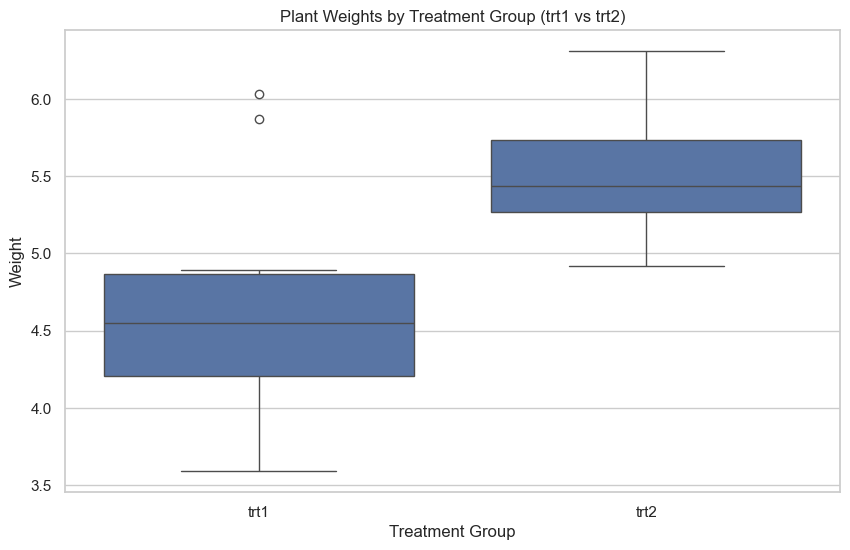

In [10]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='group', y='weight', data=df_filtered) 
plt.title('Plant Weights by Treatment Group (trt1 vs trt2)') 
plt.xlabel('Treatment Group') 
plt.ylabel('Weight') 

# Save the Box Plot as an image file 
plt.savefig('images/plant_weights_by_treatment_group.png') 

# Show the plot
plt.show()

### Swarm Plot
https://seaborn.pydata.org/generated/seaborn.swarmplot.html

A swarm plot shows individual data points along with their distribution. This helps visualize the spread of data and identify any patterns or outliers.

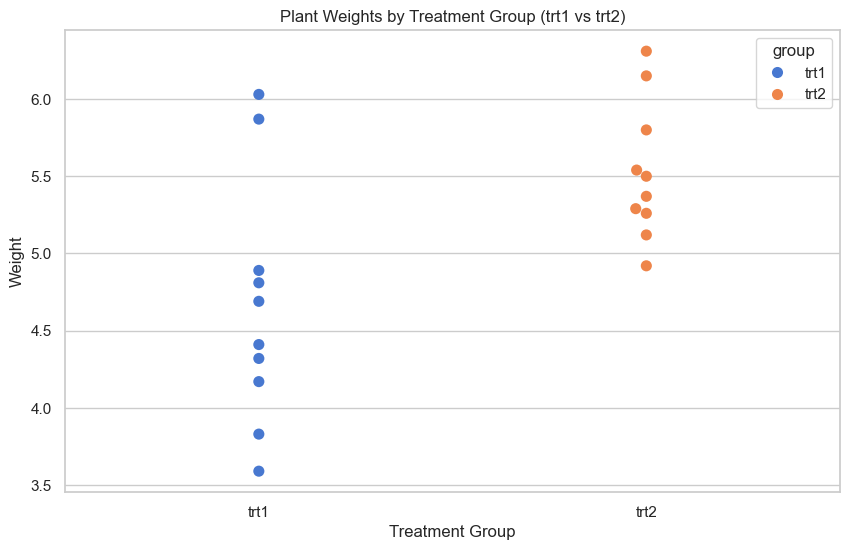

In [11]:
# Filter the dataframe for the two treatment groups
df_filtered = df_original[df_original['group'].isin(['trt1', 'trt2'])]

# Set the style of the visualization 
sns.set_theme(style="whitegrid") 

# Create the swarm plot 
plt.figure(figsize=(10, 6)) 
sns.swarmplot(x='group', y='weight', data=df_filtered, hue='group', palette="muted", size=8, legend=True) 
plt.title('Plant Weights by Treatment Group (trt1 vs trt2)') 
plt.xlabel('Treatment Group') 
plt.ylabel('Weight') 

# Save the Swarm Plot as an image file 
plt.savefig('images/plant_weights_swarmplot_trt1_vs_trt2.png') 

# Show the plot
plt.show()

### Violin Plot
https://seaborn.pydata.org/generated/seaborn.violinplot.html

A violin plot combines aspects of a box plot and a density plot, showing the distribution of the data across different treatment groups, and indicating where data points are concentrated.

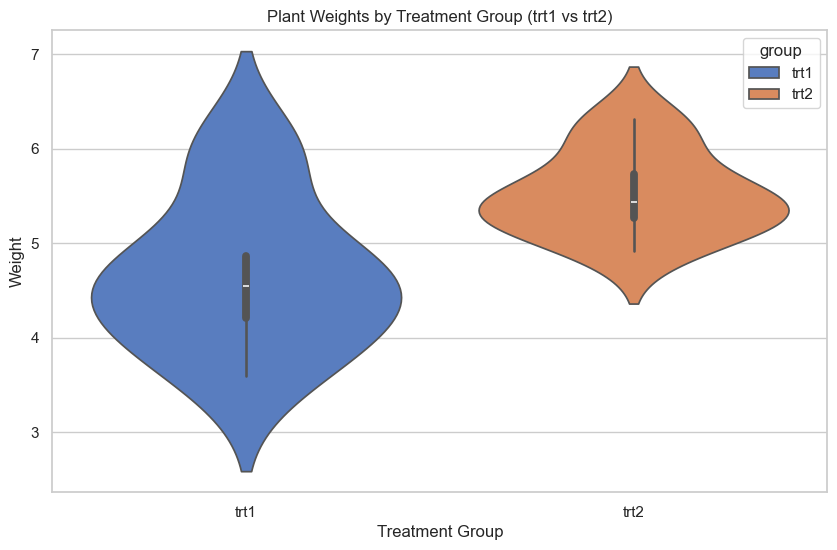

In [12]:
# Filter the dataset to include only trt1 and trt2 groups 
df_filtered = df_original[df_original['group'].isin(['trt1', 'trt2'])] 

# Set the style of the visualization 
sns.set_theme(style="whitegrid") 

# Create the violin plot 
plt.figure(figsize=(10, 6)) 
sns.violinplot(x='group', y='weight', data=df_filtered, hue='group', palette="muted", legend=True) 
plt.title('Plant Weights by Treatment Group (trt1 vs trt2)') 
plt.xlabel('Treatment Group') 
plt.ylabel('Weight') 

# Save the Violin Plot as an image file 
plt.savefig('images/plant_weights_violinplot_trt1_vs_trt2.png') 

# Show the plot
plt.show()

## How the Charts Add to Our Initial Analysis

By using these various charts, we gained a comprehensive understanding of the data, allowing us to:

Identify Anomalies: Swarm plots, violin plots, and box plots help us spot any outliers or unusual data points that deviate significantly from the rest of the data. For example, in a swarm plot, any data points that are significantly distant from the rest of the group could be potential outliers [IBM](https://www.ibm.com/topics/anomaly-detection).   In a violin plot, unusual peaks or dips in the density could indicate anomalies [statology.org](https://www.statology.org/violin-plot-in-r/). Box plots show anomalies as separate points outside the whiskers [otexts.com](https://otexts.com/weird/05-boxplots.html).

Visualize Distribution: These plots provide a clear visual representation of the distribution of plant weights within each treatment group. Swarm plots show the spread and density of individual data points, violin plots display the distribution and density, and box plots summarize the central tendency, spread, and potential outliers.

Compare Groups: By comparing the plots of different treatment groups (trt1 and trt2), we can visually assess the differences in distributions, central tendencies, and variances. This helps us understand how the treatments affect plant weights and identify any significant differences between the groups.

Support Statistical Analysis: These visualizations complement the t-test results by providing a visual context for the statistical findings. They help validate and interpret the results, making it easier to communicate the insights gained from the analysis.

By leveraging these charts, we can gain a more comprehensive understanding of the data, identify patterns and anomalies, and support our statistical analysis with clear visual evidence.

# Step 4 Perform ANOVA Test


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  

Since the output of Levene's test is greater than 0.05 p-value (0.3412266241254737),  we failed to reject the null hypothesis. This means that the variances are equal across the treatment groups, confirming the assumption of homogeneity of variances. In other words, the variability in plant weights is consistent across the different treatment groups (ctrl, trt1, and trt2).

This result is important because it validates the use of ANOVA, which assumes that the variances of the groups being compared are equal.

## Levene's test


According to [Laerd Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) to confirm the assumption of homogeneity of variances in our data, we should use Levene's test. Levene's test checks whether the variances across different groups are equal, which is a crucial assumption for performing a one-way ANOVA. If Levene's test indicates that the variances are not equal, we may need to use an alternative test, such as the Welch ANOVA, which does not assume equal variances.

In [13]:
# Perform Levene's test
levene_stat, levene_p_value = levene(ctrl, trt1, trt2)

print(f"Levene's Test: Stat={levene_stat}, p-value={levene_p_value}")

# Interpret Levene's test results
if levene_p_value > 0.05:
    print("The variances are equal (homogeneity of variances).")
else:
    print("The variances are not equal (heterogeneity of variances).")

# Perform ANOVA
anova_stat, anova_p_value = f_oneway(ctrl, trt1, trt2)

print(f"ANOVA F-statistic: {anova_stat}, p-value: {anova_p_value}")


Levene's Test: Stat=1.1191856948703909, p-value=0.3412266241254737
The variances are equal (homogeneity of variances).
ANOVA F-statistic: 4.846087862380136, p-value: 0.0159099583256229


## Interpretation of Levene's test

Since the p-value (0.3412266241254737) is greater than 0.05, we fail to reject the null hypothesis. This means that the variances are equal across the treatment groups, confirming the assumption of homogeneity of variances. In other words, the variability in plant weights is consistent across the different treatment groups (ctrl, trt1, and trt2).

## Tukey HSD Test

[Wikipedia](https://en.wikipedia.org/wiki/Tukey%27s_range_test): Provides a comprehensive overview of the Tukey HSD test, its development, and its applications.

[Oxford Reference](https://www.oxfordreference.com/display/10.1093/oi/authority.20110803110053894): Offers a quick reference and explanation of the Tukey HSD test, including its comparison with other multiple comparison methods.

[Statistics How To](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/): Explains the Tukey HSD test, its assumptions, and step-by-step calculations.

According to [Statistics How To](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/) "the Tukey Test (or Tukey procedure), also called Tukey’s Honest Significant Difference test, is a post-hoc test based on the studentized range distribution. An ANOVA test can tell you if your results are significant overall, but it won’t tell you exactly where those differences lie. After you have run an ANOVA and found significant results, then you can run Tukey’s HSD to find out which specific groups’s means (compared with each other) are different. The test compares all possible pairs of means."

In [14]:
# Combine the data into a single array and create a corresponding array of group labels
data = np.concatenate([ctrl, trt1, trt2])
labels = ['ctrl'] * len(ctrl) + ['trt1'] * len(trt1) + ['trt2'] * len(trt2)

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data, labels)

# Show the result
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


### Analysis of Tukey HSD Test Results

#### ctrl vs. trt1:

| **Statistic**       | **Value**   |
|---------------------|-------------|
| Mean Difference     | -0.371      |
| p-adj               | 0.3909      |
| Lower Bound         | -1.0622     |
| Upper Bound         | 0.3202      |
| Reject              | False       |


**Summary:**  The mean difference between the control group (ctrl) and the first treatment group (trt1) is -0.371. The p-value (0.3909) is greater than 0.05, indicating that the difference is not statistically significant. Therefore, we do not reject the null hypothesis, meaning there is no significant difference between ctrl and trt1

#### ctrl vs. trt2:

| **Statistic**       | **Value**   |
|---------------------|-------------|
| Mean Difference     | 0.494       |
| p-adj               | 0.198       |
| Lower Bound         | -0.1972     |
| Upper Bound         | 1.1852      |
| Reject              | False       |


**Summary:**  The mean difference between the control group (ctrl) and the second treatment group (trt2) is 0.494. The p-value (0.198) is greater than 0.05, indicating that the difference is not statistically significant. Therefore, we do not reject the null hypothesis, meaning there is no significant difference between ctrl and trt2.

#### trt1 vs. trt2:

| **Statistic**       | **Value**   |
|---------------------|-------------|
| Mean Difference     | 0.865       |
| p-adj               | 0.012       |
| Lower Bound         | 0.1738      |
| Upper Bound         | 1.5562      |
| Reject              | True        |


**Summary:** The mean difference between the first treatment group (trt1) and the second treatment group (trt2) is 0.865. The p-value (0.012) is less than 0.05, indicating that the difference is statistically significant. Therefore, we reject the null hypothesis, meaning there is a significant difference between trt1 and trt2.

### Assumptions for Tukey-HSD test

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/

- Observations are independent within and among groups.

- The groups for each mean in the test are normally distributed.

- There is equal within-group variance across the groups associated with each mean in the test (homogeneity of variance).

These assumptons have all been met throughout this project.

## Further Analysis of ANOVA test using Scatter Plot

### Scatter Plot

https:www.geeksforgeeks.org/how-to-make-a-scatter-plot-in-python-using-seaborn/

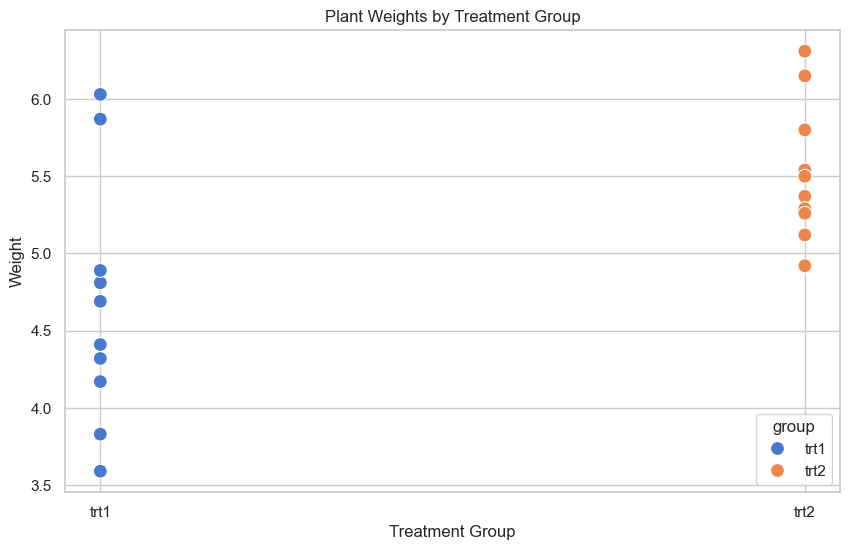

In [15]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='group', y='weight', data=df_filtered, hue='group', palette="muted", s=100, legend=True)
plt.title('Plant Weights by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')

# Save the Scatter Plot as an image file 
plt.savefig('images/plant_weights_scatterplot.png') 

# Show the plot
plt.show()

## Effect Size

According to [Statology.org](https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/) two effect's are relevant to this project.  Cohen's d Effect is relevant to the t-test, Eta Squared (η²) Effect is relevant to ANOVA test.


In [18]:
# Filter the dataset to include only ctrl, trt1, and trt2 groups
df_filtered = df_original[df_original['group'].isin(['ctrl', 'trt1', 'trt2'])]

# Extract the treatment groups
ctrl = df_filtered[df_filtered['group'] == 'ctrl']['weight']
trt1 = df_filtered[df_filtered['group'] == 'trt1']['weight']
trt2 = df_filtered[df_filtered['group'] == 'trt2']['weight']

# Calculate Cohen's d for the t-test between trt1 and trt2
group1 = trt1
group2 = trt2

# Calculate the means and pooled standard deviation
mean1, mean2 = np.mean(group1), np.mean(group2)
std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
pooled_std = np.sqrt((std1**2 + std2**2) / 2)

# Calculate Cohen's d
cohens_d = (mean1 - mean2) / pooled_std
print(f"Cohen's d: {cohens_d}")

# Perform ANOVA and calculate eta squared (η²)
model = ols('weight ~ C(group)', data=df_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate eta squared
eta_squared = anova_table['sum_sq']['C(group)'] / anova_table['sum_sq'].sum()
print(f"Eta Squared (η²): {eta_squared}")

# Display the ANOVA table
print(anova_table)

Cohen's d: -1.346156991832617
Eta Squared (η²): 0.2641482968321197
            sum_sq    df         F   PR(>F)
C(group)   3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


## Interpretation of Effect Size

__Cohen's d Calculation:__

Cohen's d is a measure of effect size used to indicate the standardized difference between two means. In this case, the negative value of -1.346156991832617 suggests that the mean weight of plants in one treatment group is significantly lower than the mean weight in the other group. The magnitude of this value indicates a large effect size, meaning there is a substantial difference between the two groups.

__Eta Squared (η²):__

Eta squared (η²) is a measure of effect size used in the context of ANOVA to indicate the proportion of total variance that is attributed to an effect. An η² value of 0.2641482968321197 means that approximately 26.4% of the total variance in plant weights is due to the differences between the treatment groups. This indicates a large effect size, suggesting that the treatment groups have a significant impact on plant weights.

__C(group):__

 This row represents the variation between the treatment groups.
- sum_sq: 3.76634, which is the sum of squares between the groups.
- df: 2.0, which is the degrees of freedom for the groups.
- F: 4.846088, which is the F-statistic.
- PR(>F): 0.01591, which is the p-value. 

Since this p-value is less than 0.05, it indicates that there are significant differences between the treatment groups.

__Residual:__

This row represents the variation within the groups (random noise).

sum_sq: 10.49209, which is the sum of squares within the groups.

df: 27.0, which is the degrees of freedom for the residuals.

## ANOVA -v- T-Tests

Reason why applying ANOVA rather than several t-tests is more appropriate when analysing more than two groups are as follows:

 ### 1. Reducing the risk of Type I Errors

 The first consideration is control Type 1 Error Rates in t-tests and ANOVA tests. The following compares both groups 

  __Single Test for Multiple Comparisons__

 https://www.datacamp.com/tutorial/anova-test

 - When comparing more than two groups, performing multiple t-tests increases the risk of Type I errors because each test carries its own probability of error. For example, if you perform three t-tests, each with a significance level of 0.05, the cumulative probability of making at least one Type I error is higher than 0.05.
 - ANOVA, on the other hand, conducts a single test to compare the means of all groups simultaneously. This single test maintains the overall significance level (e.g., 0.05), thereby controlling the risk of Type I errors.

 __Control of Familywise Error Rate__

  https://www.datacamp.com/tutorial/anova-test

  - The familywise error rate is the probability of making one or more Type I errors across a set of comparisons. ANOVA controls this rate by using a single F-test to assess the overall differences among group means.
  -  By doing so, ANOVA ensures that the likelihood of incorrectly rejecting the null hypothesis (i.e., concluding that there is a difference when there isn't) remains at the desired significance level

 ### 2. Efficiency

 According to [Laerd Statistics](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php) ANOVA is preferred over multiple t-tests because it controls the Type I error rate, is more efficient by comparing all groups in a single test, and reduces the complexity and time required for analysis.

 ### 3. Comprehensive Analysis

 [Statology.org](https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/) explains that ANOVA is a statistical method used to compare the means across three or more groups, providing a single overall test to determine if there are significant differences among the groups. This approach allows for a more holistic understanding of the data, identifying whether at least one group mean is different from the others without needing to perform numerous individual tests.

### 4. Post-Hoc Tests

 https://www.datacamp.com/tutorial/anova-test
 https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/

 [Statology.org](https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/) explains that ANOVA is used to determine if there are significant differences among group means and that post-hoc tests, such as Tukey's HSD, can be performed to identify which specific groups differ from each other
 - These post-hoc tests are designed to control the Type I error rate while making multiple comparisons, further reducing the risk of false positives.
 - In the PlantGrowth dataset, if we were to compare the weights of plants across three treatment groups (ctrl, trt1, and trt2) using multiple t-tests, we would increase the risk of Type I errors. Instead, by using ANOVA, we perform a single test to determine if there are any significant differences among the groups, thereby controlling the overall error rate

 ### 5. Consideration of Effect Sizes

 https://www.datacamp.com/tutorial/anova-test

 Effect Sizes are a crucial metric in statistical analysis that measures the magnitude of the difference between groups. Unlike p-values, which only tell us whether a difference exists, effect size quantifies the size of that difference, providing more context on the practical significance of the findings. Effect size helps in understanding how large or small the observed effect is, beyond just knowing that it is statistically significant. Effect size complements p-values by providing additional information, helping in understanding the strength and importance of the findings.

 #### Types of Effect Size

 According to [Statology.org](https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/) two effect's are of relevance to this project.  
 
 - Cohen's d Effect is relevant to the t-test
 - Eta Squared (η²) Effect is relevant to ANOVA test.

 #### Cohen's d Effect

 https://www.statology.org/interpret-cohens-d/

 Cohen's d is a measure of effect size used to indicate the standardized difference between two means. It is calculated as the difference between two means divided by the pooled standard deviation. In this case, the negative value of -1.346156991832617 suggests that the mean weight of plants in one treatment group is significantly lower than the mean weight in the other group. The magnitude of this value indicates a large effect size, meaning there is a substantial difference between the two groups.

 #### Eta Squared (η²) Effect

 https://www.statology.org/eta-squared/

 Eta squared is used in the context of ANOVA to measure the proportion of total variance that is attributed to an effect. It ranges from 0 to 1, with higher values indicating a larger effect size. An η² value of 0.2641482968321197 means that approximately 26.4% of the total variance in plant weights is due to the differences between the treatment groups. This indicates a large effect size, suggesting that the treatment groups have a significant impact on plant weights.
 
 #### Applying Effect Size to t-test and ANOVA test results
 
 In the context of the PlantGrowth dataset, the ANOVA results indicate that there are significant differences between the treatment groups, and the effect sizes (Cohen's d and eta squared) suggest that these differences are substantial. This means that the treatment groups have a significant impact on the plant weights, and the differences are not just statistically significant but also practically meaningful.

 

## Conclusion 

 __Type I errors:__ 
 
 Based on the analysis, the ANOVA test is better as it reduces Type I errors. The t-test, however, only looked at two groups, whereas the ANOVA test looked at three. Further tests would need to be carried out to examine what the outcome of a t-test would be for the Ctrl v trt1 groups and ctrl v trt2 groups and then compare this to the initial test carried out.

 __Statistical Significance:__
 
  The ANOVA test showed a statistically significant difference between the three treatment groups (ctrl, trt1, and trt2) with a p-value of 0.0159. This indicates that at least one of the group means is significantly different from the others.  The t-test however only examined two groups.

 __Effect Size:__ 
 
 Cohen's d or Eta Squared (η²) effect both showed a high effect on treatments on plant growth.

 __Post-Hoc Analysis__

 There is a need for post-hoc tests (such as Tukey's HSD) to identify which specific groups differ from each other. This is necessary to pinpoint where the significant differences lie.

 __Assumptions Check__

 When conducting these tests, it is important to check the t-test and ANOVA's assumptions, such as normality, homogeneity of variances, and independence of observations. Ensuring these assumptions are met is crucial for the validity of the test results.  I must also be conscious that Tukey's HSD test has its own assumptions which muct be adhered to.

 __Visualizations__

 It cannot be underestimated how useful the plots in this project (such as scatter plots, box plots, swarm plots, and violin plots) were in understanding and communicating the differences between groups. These plots provided a clear, visual summary of the data and supported the statistical findings. They also helped identify where code had to be modified when completing the t-test.

## Note

### The code for this project was generated with the help of an AI tool, and subsequently reviewed and verified for accuracy and functionality.